# Homework 1: Numpy, Scipy, Pandas

### Due Monday Feb 5, 2018 @ 2pm


## #0: Get set up with your environment to work on and submit homework

a. Create a new homework repository at github

<img src="data/screenshot_1.png">

Name your repo something sensible (e.g., python-ay250-homeworks). Given your Berkeley affiliation you should be able to get private repos if you'd like.

<img src="data/screenshot_2.png">


b. Clone this repo locally and make a directory for this week's homework:

```bash
cd /class/directories ## this will be different on your machine...whereever you want to keep your work.

# change <username> to your github username:
git clone https://github.com/<username>/python-ay250-homework.git
cd python-ay250-homework
mkdir hw_1
echo "hw_1 README" >> hw_1/README.md
git add hw_1/README.md
git commit hw_1/README.md -m "added hw_1 directory"
git push
```

c. Copy this notebook into your `hw_1` folder from a local version of the python-seminar repo

```bash
cd /class/directories
git clone https://github.com/profjsb/python-seminar.git 
cd python-seminar
git pull
cp -r Homeworks/hw_1/* /class/directories/python-ay250-homework/hw_1/
```

d. Get working! Be sure to check in your work as often as you'd like

```bash
cd /class/directories/python-ay250-homework
git add hw_1/<whatever>
git commit <whatever> -m "this is a check in"
```

e. To submit your work, go to this form to register your homework Repo URL (https://goo.gl/forms/4DTPxonYBAxmfxJG2). If you've made your repo private, you'll need to add us as collaborators to the repo.  Our Github handles are `@profjsb` and `@chelseaharris`.

## #1:  Super-resolution imaging 

Obtaining several snapshots of the same scene, from microscopes to telescopes, is useful for the postprocessing increase of signal to noise: by summing up imaging data we can effectively beat down the noise. Interestingly, if we image the same scene from different vistas we can also improve the clarity of the combined image. Being able to discern features in a scene from this combination effort is sometimes called super-resolution imaging.

Here, we'll combine about 4 seconds of a shaky video to reveal the statement on a license plate that is not discernable in any one frame.

<img src="Data/im2-1.png">

A tarball of the data is at: https://drive.google.com/open?id=0B4vIeCR-xYNnbXFJTTVlVnpUZkk

```bash
tar -xvzf homework1_data.tgz  # do NOT check this files into git...
```

**Problem 1** Read in each image into a `numpy` array. Resize each frame to be 3 times larger in each axis (ie. 9 times larger images). Using `scipy.signal.fftconvolve` find the offsets of each frame with respect to the first frame. Report those offsets to 2 decimal places. 

   - Hint1: you'll need to figure out how to resize a numpy array
   - Hint2: you'll want to reverse the second image when doing the convolution: `scipy.signal.fftconvolve(im1, im2[::-1, ::-1])`
   - Hint3: you'll need to figure out how to identify the peak of the fft convolution to find the offsets between images

In [68]:
import imageio
from skimage import color
from skimage import io
from os import listdir
from scipy.ndimage.interpolation import zoom
from scipy.ndimage.interpolation import shift
from scipy import signal 
import numpy as np

#import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'random', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [69]:
# Path where the data is saved on my machine
path = '/Users/cwfink/Documents/School/UC_Berkeley/Classes/Spring_2018/AY250/HW/python-ay250-homework/hw_1/Data_2/'

imageList = list()
croppedImageList = list()
offsetList = list()
convolved_List = list()


for file in listdir(path):
        
    img = color.rgb2grey(io.imread(path+file))#, as_grey=True) #import the rbg image as a greyscale image
    img -= np.mean(img) # subtract off the mean of each image (needed for fftconvolve())
    imageList.append(zoom(img,3)) #append to the list of images and resize each image by interpolation

imageList = np.asarray(imageList)


#Define the center so that we can crop out a percentage of the images

center = imageList[0].shape[0]/2
lowerLim = int(center - imageList[0].shape[0]*.3)
upperLim = int(center + imageList[0].shape[0]*.3)

# now we want to crop our images about the center to remove the yellow border and make them square
for ii in range(len(imageList)):
    croppedImageList.append(imageList[ii][(lowerLim):(upperLim),(lowerLim):(upperLim)])

croppedImageList = np.asarray(croppedImageList)

# we now convolve the firt image with itself to define the origin. we then calculate the offset for from this point
# for the remaing images

conv_orig = signal.fftconvolve(croppedImageList[0], croppedImageList[0,::-1, ::-1],mode ='same')
orig = np.unravel_index(np.argmax(conv_orig), conv_orig.shape)

for iImage in range(len(croppedImageList)):
    image_temp = signal.fftconvolve(croppedImageList[0], croppedImageList[iImage,::-1, ::-1],mode ='same')
    #image_temp -= np.mean(image_temp)
    convolved_List.append(image_temp)
    peak_corr = np.unravel_index(image_temp.argmax() , image_temp.shape)
    offsetList.append(np.asarray(peak_corr) - np.asarray(orig))

print('The offsets are: ', offsetList)
# Not sure how to report the offset to less than an integer

The offsets are:  [array([0, 0]), array([72,  0]), array([0, 0]), array([ 57, -47]), array([-67, -21]), array([  0, -32]), array([-71,  63]), array([0, 0]), array([-64, -95]), array([-162,  -40]), array([31,  0]), array([0, 0]), array([-44, -33]), array([90,  0]), array([-58, -41]), array([  0, -19]), array([-31,   8]), array([ 7, 15]), array([-121,  -32]), array([-121,  -34]), array([ -23, -135]), array([0, 0]), array([0, 0]), array([-81, -32]), array([-72, -64]), array([ -81, -103]), array([-22,   6]), array([76,  0]), array([-84,  28]), array([-81, -37]), array([ 39, -48]), array([  0, -30]), array([  0, -61]), array([0, 0]), array([-82, -73]), array([-32, -38]), array([-74, -51]), array([  0, -20]), array([-1,  0]), array([20, 34]), array([0, 0]), array([ -1, -48]), array([-38,  23]), array([-1, -1]), array([-15, -34]), array([ -58, -138]), array([-32, -30]), array([102,   0]), array([27,  0]), array([40,  6]), array([102,   0]), array([-23, -91]), array([ -56, -155]), array([ -28,

**Problem 2** Shift each image to register the frames to the original (expanded in size) frame. You should, in general, be shifting by subpixel offsets. You might want to look at `scipy.ndimage.interpolation.shift`

In [70]:
images_shift = np.zeros(shape=croppedImageList.shape)
for ii in range(len(images_shift)):
    images_shift[ii] = shift(croppedImageList[ii],offsetList[ii])

**Problem 3** Combine all the registered images to form a super-resolution image. What does the license plate read?

The license plate says: IM A CAR


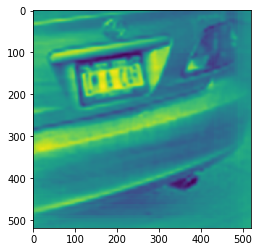

In [71]:
super_image = np.sum(images_shift, axis = 0) + croppedImageList[0]
plt.imshow(super_image)

print("The license plate says: IM A CAR")

# #2: An elementary introduction to spectral audio compression

In this problem, we'll explore the very basics of audio compression in the spectral domain using numpy and scipy. We'll do a bit of visualization with matplotlib, but since that is covered later in the course, we'll provide those functions for you.

Audio compression is a large and complex topic, and the design of a format for compressed audio such as the popular [MP3](http://en.wikipedia.org/wiki/MP3) is too complex to cover in detail here. However, we will introduce the basic tools that most such compression formats use, namely:

1. Converting the input signal to the frequency domain by taking a Fast Fourier Transform (FFT).

2. Dropping information in the frequency domain, resulting in a smaller amount of data.

3. Reconstructing back the signal in the time domain from this smaller representation of the signal.

Steps 1 and 2 above are the 'encoding' part of signal compression, and step 3 is the 'decoding' part. For this reason, the tools that perform these steps are typically referred to as signal 'codecs', short for encoders/decoders.

Note that here we say 'signal': while MP3 is an audio format, the same ideas apply to the compression of digital images with formats such as JPEG and video.  Virtually all multimedia technologies we use today, from audio players to cell phones, digital cameras and YouTubeVideo, are based on sophisticated extensions and applications of these simple ideas.

Let's first load the plotting tools and importing some tools we'll need later:

In [72]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import collections



# we'll need some path manipulations later on
import os


Populating the interactive namespace from numpy and matplotlib


We define a simple utility function to listen to audio files right in the browser:

In [73]:
def Audio(fname):
    """Provide a player widget for an audio file.
    
    Parameters
    ==========
    fname : string
      Filename to be played.
      
    Warning
    =======
    
    Browsers cache audio very aggressively. If you change an
    audio file on disk and are trying to listen to the  new version, you 
    may want to 
    """
    from IPython.display import HTML, display
    
    # Find out file extension and deduce MIME type for audio format
    ext = os.path.splitext(fname)[1].replace('.', '').lower()
    mimetype = 'audio/' + ('mpeg' if ext == 'mp3' else ext)
    
    tpl = """<p>{fname}:</p>
<audio controls>
    <source src="files/{fname}" type="{mimetype}">

Your browser does not support the Audio element; you can play 
<a href="files/{fname}">this file</a> manually.
</audio>
"""
    display(HTML(tpl.format(**locals())))

We also define a convenience wrapper around `plt.specgram`, [matplotlib's spectrogram function](http://matplotlib.org/api/mlab_api.html#matplotlib.mlab.specgram), with a colorbar and control over the color limits displayed. This will make it easier to compare across different signals with the same colors for all inputs.

In [74]:
def specgram_cbar(x, title=None, clim=(0, 80) ):
    """Plot spectrogram with a colorbar and range normalization.
    
    Call matplotlib's specgram function, with a custom figure size, 
    automatic colobar, title and custom color limits to ease 
    comparison across multiple figures.
    
    Parameters
    ==========
    x : array
      One-dimensional array whose spectrogram should be plotted.
      
    title : string
      Optional title for the figure.
      
    clim : 2-tuple
      Range for the color limits plotted in the spectrogram.
    """
    f = plt.figure(figsize=(10,3))
    plt.specgram(x, Fs = 2)
    plt.colorbar()
    plt.clim(*clim)
    if title is not None:
        plt.title(title)
    plt.show()

**Problem 1**: Use the `Audio` function above to listen to the signal we will be experimenting with, a simple voice recording stored in the file `Homeworks/hw1/data/voice.wav`.

Note: if your browser doesn't support audio, you may try a different browser.   We've tested current versions of Chrome and Firefox, and it works OK with both.

In [75]:
# your code here
path = 'data/'
file = 'voice.wav'
Wav_Str = path+file


Audio(Wav_Str)


**Problem 2**: Write a function to compress a 1-d signal by dropping a fraction of its spectrum. 

You can drop the smallest components by setting their values to zero.

*Hints*: 

- look at the `np.fft` module, keeping in mind that your input signal is real.
- look at the `argsort` method of numpy arrays.

In [76]:


def compress_signal(x, fraction):
    """Compress an input signal by dropping a fraction of its spectrum.
    
    Parameters
    ==========
    x : array
      1-d real array to be compressed
      
    fraction : float
      A number in the [0,1] range indicating which fraction of the spectrum
      of x should be zeroed out (1 means zero out the entire signal).
      
    Returns
    =======
    x_approx : array
      1-d real array reconstructed after having compressed the input.
    """

    
    X_FFT = np.fft.rfft(x) #look at the data in frequency domain, we use rfft since the original data is real
        
    cut_List = X_FFT.argsort()[:int(len(X_FFT)*fraction)]  #Find the index of the smallest fraction of data 
    X_FFT[cut_List] = 0 #set these elements to zero
    
    X_iFFT = np.fft.irfft(X_FFT) # compute the inverse FFT to get back to time domain 
                
    return X_iFFT
    
    






As a quick visual check (not that this is *not* a formal test of correctness), experiment with a simple random signal by changing the compression ratio and plotting both the signal and the compressed version:

In [77]:
x = np.random.rand(128)

128


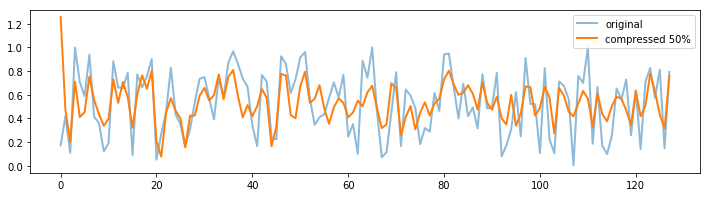

In [78]:
fraction = 0.5  # play changing this in the 0-1 range

xa = compress_signal(x, fraction)
print(len(xa))

plt.figure(figsize=(12,3))
plt.plot(x, alpha=0.5, lw=2, label='original')
plt.plot(xa, lw=2, label='compressed {0:.0%}'.format(fraction))
plt.legend();

**Problem 3**: Write a function that will compress an audio file by a dropping a fraction of its spectrum, writing the output to a new file.

If the input file is named `a.wav` and the compression fraction is 0.9, the output file should be named `a_comp_0.9.wav`.

*Hints:* 

- look at the `scipy.io` module for routines dealing with files in `wav` format.

- you may need to use the `astype` method of numpy arrays to get the correct data type for `wav` files.

In [79]:
def compress_wav(fname, fraction):
    """Compress an audio signal stored in an input wav file.
    
    The compressed signal is returned as a numpy array and automatically written 
    to disk to a new wav file.
    
    Parameters
    ==========
    fname : string
      Name of the input wav file
      
    fraction : float
      Fraction of input data to keep.
      
    Returns
    =======
    rate : int
      Bit rate of the input signal.

    x : array
      Raw data of the original input signal.
      
    x_approx : array
      Raw data of the compressed signal.
      
    new_fname : string
      Auto-generated filename of the compressed signal.
    """
    data = wavfile.read(fname) #import file  
    rate = data[0]
    x = data[1]
    
    x_approx = compress_signal(x, fraction)
    
    filename, file_extension = os.path.splitext(fname)
    
    new_fname = filename + '_comp_'+ str(fraction) + file_extension
    
    x_approx = x_approx.astype(np.int16)
    
    wavfile.write(new_fname, rate,x_approx)
    
    
    
    return rate,x,x_approx,new_fname
    
    


**Problem 4**: Study the effect of compressing the input file at different ratios: 0.1, 0.5, 0.75, 0.9, 0.95, 0.99.

Using the `OrderedDict` class from the [Python collections module](http://docs.python.org/2/library/collections.html#collections.OrderedDict), store the uncompressed signal as well as the compressed array and filename for each compression ratio.

You will create an `OrderedDict` called `voices`, with:

- keys: compression ratios
- values: pairs of (x, filename) where x is the compressed audio and filename is the name of the compressed file.

In [80]:
# your code here
Wav_Str = 'data/voice.wav'
ratios = [0.1,0.5,0.75,0.9,0.99]

voices = collections.OrderedDict()
for ratio in ratios:

    rate,x,x_approx,new_fname = compress_wav(Wav_Str,ratio)
    voices.update( {ratio : (x_approx,new_fname) })



**Problem 5**: Loop over the `voices` dict, and for each one generate an audio player as well as a spectrogram.  Observe how the spectrogram changes, and listen to each file.  At what ratio do you stop understanding the recording?

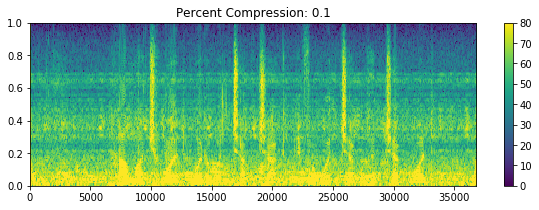

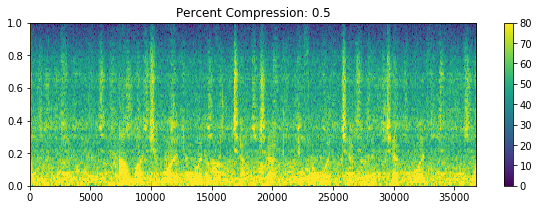

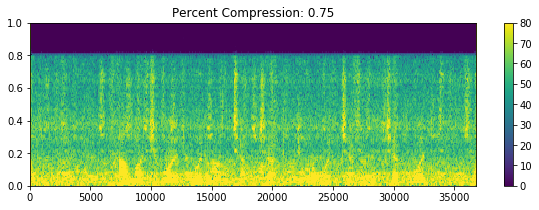

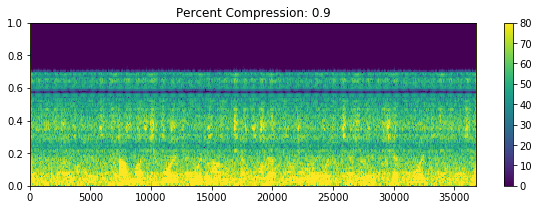

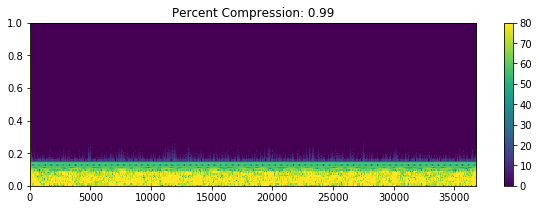

In [81]:
# your code here

for key in voices.keys():
    Audio(voices[key][1])
    title = 'Percent Compression: ' + str(key)
    specgram_cbar(voices[key][0], title= title )
    
# I can 'understand' what is being said in all of them, probably because I know what is supposed to be said! But in 
# fairness I guess I would say you stop being able to understand it after .9


# #3: Armchair Astronomer

Often times, people act as good sensors of the physical universe. We can use Google Trends data to help us determine some fundamental parameters of the Solar System.

**Problem 1**: Using just the CSV file we created in the pandas lecture (`merged_data.csv`) and some frequency analysis tools in `scipy` to determine:

   - the number of days in a year
   - the period of the moon's orbit around the Earth
   
Hint: `from scipy.signal.spectral import lombscargle` (you'll want to normalize your signal so it has a mean of zero.)

Number of weeks in a year:  52.2  weeks
Number of days in a month:  29.47  days


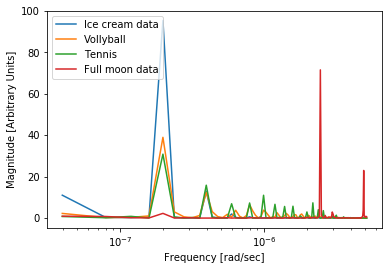

In [85]:
# your code here
import pandas as pd
from datetime import datetime, timedelta
from scipy.signal.spectral import lombscargle
import time

#constants for conversions
sec_per_day = 3600*24
sec_per_week = sec_per_day*7



#read in data file
data = pd.read_csv('data/merged_data.csv',index_col=0,parse_dates=[0]) #read in data

#normalize the data to have mean 0, variance 1
data['full moon'] = (data['full moon']-np.mean(data['full moon']))/np.std(data['full moon'])
data['ice cream'] = (data['ice cream']-np.mean(data['ice cream']))/np.std(data['ice cream'])
data['Volleyball'] = (data['Volleyball']-np.mean(data['Volleyball']))/np.std(data['Volleyball'])
data['tennis'] = (data['tennis']-np.mean(data['tennis']))/np.std(data['tennis'])



# Creat frequencies 
freq_int = list()

dt1 = timedelta.total_seconds(data.index[1]-data.index[0])
N = len(data.index)
freqs = np.fft.fftfreq(N, dt1)*2*np.pi

freqs_new = freqs[1:] #remove the zero frequency since we don't care about the DC component

times = list()
for time in data.index:
    times.append(timedelta.total_seconds(time-data.index[0])) #convert datetimes to absolute seconds



#Calculate the PSD's
periodogram_ice_cream = lombscargle(times, data['ice cream'],freqs_new)
periodogram_full_moon = lombscargle(times, data['full moon'],freqs_new)
periodogram_Volly = lombscargle(times, data['Volleyball'],freqs_new)
periodogram_Tennis = lombscargle(times, data['tennis'],freqs_new)


#Find frequency with maximu
index_max_ice_cream = np.argmax(periodogram_ice_cream[:int(len(freqs_new)/2)])
index_max_full_moon = np.argmax(periodogram_full_moon[:int(len(freqs_new)/2)])
index_max_Volly = np.argmax(periodogram_Volly[:int(len(freqs_new)/2)])
index_max_Tennis = np.argmax(periodogram_Tennis[:int(len(freqs_new)/2)])

max_freq_ice_cream = freqs_new[index_max_ice_cream]/(2*np.pi)
max_freq_full_moon = freqs_new[index_max_full_moon]/(2*np.pi)
max_freq_Volly = freqs_new[index_max_Volly]/(2*np.pi)
max_freq_Tennis = freqs_new[index_max_Tennis]/(2*np.pi)


#Find Period
year_ice_cream_sec = 1/max_freq_ice_cream
year_Volly_sec = 1/max_freq_Volly
year_Tennis_sec = 1/max_freq_Tennis

month_full_moon_sec = 1/max_freq_full_moon



#convert to weeks/days
month_full_moon_days = month_full_moon_sec/sec_per_day


year_ice_cream_days = year_ice_cream_sec/sec_per_week
year_Volly_days = year_Volly_sec/sec_per_week
year_Tennis_days = year_Tennis_sec/sec_per_week

print('Number of weeks in a year: ', np.mean([year_ice_cream_days,year_Volly_days,year_Tennis_days]), ' weeks')

print('Number of days in a month: ', round(month_full_moon_days,2), ' days')



# For plotting
plt.figure()
plt.plot(freqs_new[:int(len(freqs_new)/2)],periodogram_ice_cream[:int(len(freqs_new)/2)],label = 'Ice cream data')
plt.plot(freqs_new[:int(len(freqs_new)/2)],periodogram_Volly[:int(len(freqs_new)/2)],label = 'Vollyball')
plt.plot(freqs_new[:int(len(freqs_new)/2)],periodogram_Tennis[:int(len(freqs_new)/2)],label = 'Tennis')
plt.plot(freqs_new[:int(len(freqs_new)/2)],periodogram_full_moon[:int(len(freqs_new)/2)],label = 'Full moon data')
plt.legend(loc='best')
plt.xscale('log')
plt.ylabel('Magnitude [Arbitrary Units]')
plt.xlabel('Frequency [rad/sec]')
plt.show()



# #4: Reproducing some insights about the Election

Nate ("not a genius, just a Bayesian") Silver writes often about polls and their utility of predicting elections. One of the things he emphasized during the 2016 campaign is that even "large" polls of people with a consistent lead for one candidate will show wild swings in any given window in time.

**Problem 1**: Using Pandas and `numpy`, try to reproduce this plot from a Nate Silver Tweet qualitatively using the same assumptions.

<img src="https://www.evernote.com/l/AUU-KkH3Z-lBdKokzCzVIUe53YZLQ9e_AuMB/image.png">

https://twitter.com/NateSilver538/status/769565612955824128

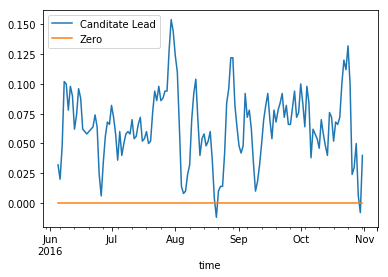

In [86]:
import numpy as np
import random
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# We assume that the polling is totally random, therefore we claim that any person polled could randomly support trump or hillary


def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


def get_random_poll(poll_per_day,days_in_poll,start_month,end_month,lead_prct,num_years,seed):
    #set seed for reproducability
    np.random.seed(seed)
    

    #time = np.linspace(1,num_days,num_days)

    start_year = 2016
    end_year = start_year + num_years

    time = np.arange(datetime(start_year,start_month,1), datetime(end_year,end_month,1), timedelta(days=1)).astype(datetime)
    
    lead = list()
    hillary = list()
    trump = list()
    
    for iDay in range(len(time)):
        
    #for day in range(days_in_poll):
        poll = list()
        for iPoll in range(poll_per_day):
            rand_temp = np.random.random()
            if rand_temp < 0.5:
                rand_temp = 0
            elif rand_temp >= 0.5:
                rand_temp = 1

            poll.append(rand_temp)

        hist , bins = np.histogram(poll, bins =2) 
        hillary.append(hist[0])
        trump.append(hist[1])
    hillary = np.asarray(hillary)
    trump = np.asarray(trump)
    
    lead = (hillary-trump)/(poll_per_day)

    
    lead_running_ave = running_mean(lead, days_in_poll)    



    #add a 0.06 point lead to hillary
    lead_running_ave += lead_prct

    zero_line = np.zeros(shape = lead_running_ave.shape)
    
    data = pd.DataFrame(np.transpose(np.array([time[4:],lead_running_ave,zero_line])),columns=['time','Canditate Lead','Zero'])
    data.set_index('time', inplace=True)

    return data
    
    
poll_per_day = 200
days_in_poll = 5
start_month = 6
end_month = 11
num_years = 0
lead_prct = 0.06
seed = 52

  
    
data = get_random_poll(poll_per_day,days_in_poll,start_month,end_month,lead_prct,num_years,seed) 
data.plot()
plt.show()
    


**Problem 2**: Clearly, even with a 6% point lead, there's a chance that this sort of poll would show the other person in the lead. How much would ahead (in percent) would a candidate need to be to have a tracking poll never show the other candidate to be ahead over the course of a year (in your simulation)?

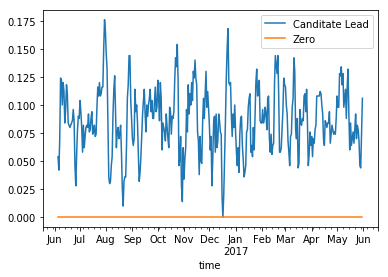

One candidate would need to have a  8.2  percent lead


In [87]:
# your code here


poll_per_day = 200
days_in_poll = 5
start_month = 6
end_month = 6
num_years = 1
lead_prct = 0.06
data['Canditate Lead'][0] = -1
while np.min(data['Canditate Lead']) < 0:
    
    lead_prct += 0.001
    data = get_random_poll(poll_per_day,days_in_poll,start_month,end_month,lead_prct, num_years,seed) 
    
    


data.plot()
plt.show()

print('One candidate would need to have a ', round(lead_prct*100,3) , ' percent lead')

**Problem 3**: With a 3 and 6% lead, how many people would need to be polled in 1 day to have the rolling 5-day poll result always show the leader ahead (over a year)?

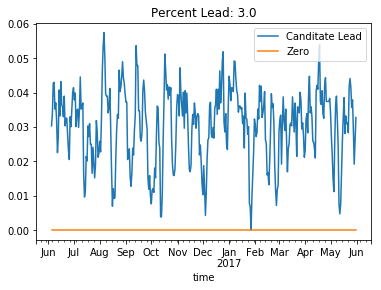

1801  people would need to be polled in 1 day for  3.0  percent lead


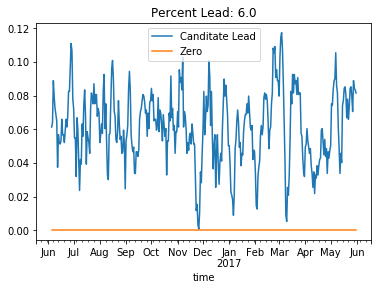

435  people would need to be polled in 1 day for  6.0  percent lead


In [88]:
# your code here



days_in_poll = 5
start_month = 6
end_month = 6
num_years = 1
lead_prct_list = [0.03, 0.06]


for lead_prct in lead_prct_list:
    poll_per_day = 200
    data['Canditate Lead'][0] = -1
    
    while np.min(data['Canditate Lead']) < 0:

        poll_per_day += 50
        data = get_random_poll(poll_per_day,days_in_poll,start_month,end_month,lead_prct, num_years,seed) 
    
    data['Canditate Lead'][0] = -1
    poll_per_day -= 50
    while np.min(data['Canditate Lead']) < 0:

        poll_per_day += 1
        data = get_random_poll(poll_per_day,days_in_poll,start_month,end_month,lead_prct, num_years,seed) 
   

    titleStr = 'Percent Lead: ' + str(round(lead_prct*100,3))    
    data.plot()
    plt.title(titleStr)
    plt.show()

    print(poll_per_day, ' people would need to be polled in 1 day for ', str(round(lead_prct*100,3)), ' percent lead' )